In [ ]:
import os

import matplotlib.pyplot as plt
from aicsimageio import AICSImage

import image_utils

In [2]:
image_directory = "/Volumes/Ries_Ewers/Septin2-GFP"
image_file = "20240719_NRK49FS2GFP_UExM_GFP-488_aTub-568_DAPI_25min_01.nd"
image_path = os.path.join(image_directory, image_file)

In [3]:
im = AICSImage(image_path)

OpenJDK 64-Bit Server VM warning: Attempt to protect stack guard pages failed.
OpenJDK 64-Bit Server VM warning: Attempt to deallocate stack guard pages failed.
SLF4J: No SLF4J providers were found.
SLF4J: Defaulting to no-operation (NOP) logger implementation
SLF4J: See https://www.slf4j.org/codes.html#noProviders for further details.


In [39]:
mean_proj_xy = im.data.mean(2).squeeze()
max_proj_xy = im.data.max(2).squeeze()
mean_proj_xz = im.data.mean(3).squeeze()
max_proj_xz = im.data.max(3).squeeze()

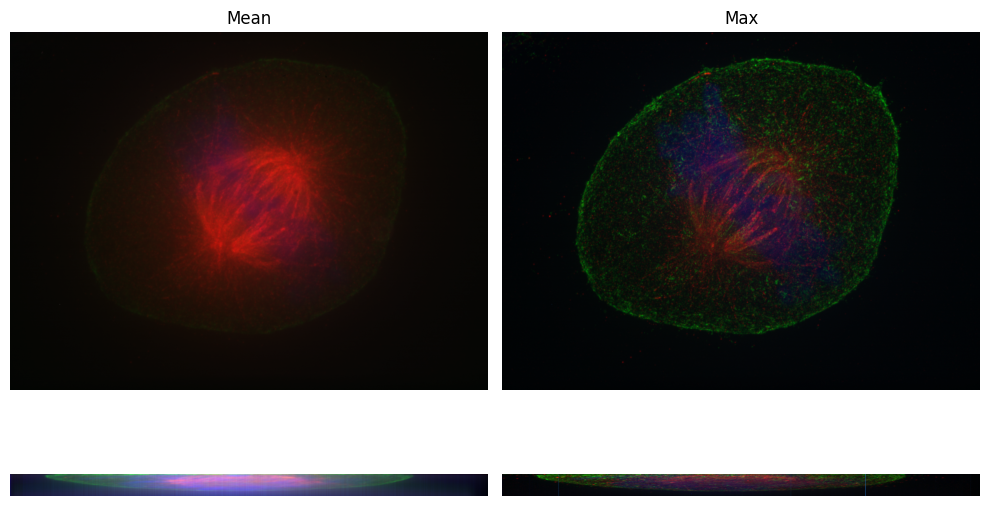

In [49]:
fig, axs = plt.subplots(2,2,figsize=(10,7))
axs[0,0].imshow(image_utils.normalize_image(mean_proj_xy))
axs[0,1].imshow(image_utils.normalize_image(max_proj_xy))
axs[1,0].imshow(image_utils.normalize_image(mean_proj_xz).transpose(1,0,2))
axs[1,1].imshow(image_utils.normalize_image(max_proj_xz).transpose(1,0,2))
axs[0,0].axis('off')
axs[0,1].axis('off')
axs[1,0].axis('off')
axs[1,1].axis('off')
axs[0,0].set_title('Mean')
axs[0,1].set_title('Max')
fig.tight_layout()